In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN



The function convertToMatrix, takes a time series data and a step parameter. It converts the time series into a set of input-output pairs for training a neural network. It is creating input sequences (X) and corresponding output values (Y) with a sliding window of size step.

In [3]:
def convertToMatrix(data,step):
  X,Y=[],[]
  for i in range (len(data)-step):
    d= i+step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X),np.array(Y)


Sets parameters like step, N (total data points), and Tp (number of training points). Generates a time series x and creates a Pandas DataFrame df with the time series.

In [5]:
step=4
N=1000
Tp=800
# generates an array t with values from 0 to N-1. It represents the time steps or indices of the time series.
t=np.arange(0,N)
#generates a time series x by applying the cosine function to the values in t.
#It's a simple harmonic oscillation with a frequency of 0.02.
#The cosine function is used here to create a smooth and periodic time series.
x=np.cos(0.02*t)
df=pd.DataFrame(x)

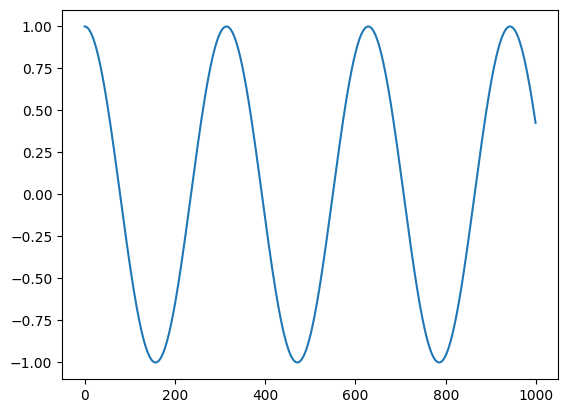

In [6]:
plt.plot(df)
plt.show()


Splits the time series into training and testing sets, and appends additional points to the testing set for future predictions.

test = np.append(test, np.repeat(test[-1, ], step)):
-test[-1, ] selects the last row of the test set, representing the last observation in your original test set.
-np.repeat(test[-1, ], step) repeats the last observation step times. This is done to create synthetic data points beyond the original test set.
-np.append(test, np.repeat(test[-1, ], step)) appends the repeated values to the original test set, extending it.

train = np.append(train, np.repeat(train[-1, ], step)):
Similar to the test set, this line repeats the last observation in the training set (train[-1, ]) step times.
It then appends these repeated values to the original training set, extending it.

In [10]:
values=df.values
#selects the rows from index 0 to Tp-1 (excluding Tp) and all columns, effectively extracting the training portion of your time series.
#selects the rows from index Tp to N-1 and all columns, effectively extracting the test portion of your time series.
train,test= values[0:Tp, :], values[Tp:N, :]
test=np.append(test, np.repeat(test[-1, ],step))
train= np.append(train, np.repeat(train[-1,],step))


In Keras, the input shape for an RNN layer is expected to be a three-dimensional tensor of the form (batch_size, timesteps, input_features):

batch_size: The number of sequences in a batch.

timesteps: The number of time steps in each sequence.

input_features: The number of features at each time step.

In [12]:
train_X,train_Y = convertToMatrix(train,step)
test_X, test_Y = convertToMatrix(test,step)

train_X=np.reshape(train_X, (train_X.shape[0],1,train_X.shape[1]) )
test_x=np.reshape(test_X, (test_X.shape[0],1,test_X.shape[1]))
#After reshaping, they become (number_of_sequences, 1, number_of_features).

In [13]:
#model building
model=Sequential()
model.add(SimpleRNN(units=16,input_shape=(1,step), activation='tanh'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 16)                336       
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.fit(train_X,train_Y,epochs=5,batch_size=16)

Epoch 1/5
50/50 [==============================] - 1s 1ms/step - loss: 0.1012
Epoch 2/5
50/50 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 3/5
50/50 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 4/5
50/50 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 5/5
50/50 [==============================] - 0s 1ms/step - loss: 0.0028


In [16]:
trainpredict=model.predict(train_X)
testpredict=model.predict(test_x)
predicted= np.concatenate((trainpredict,testpredict),axis=0)

7/7 [==============================] - 0s 2ms/step


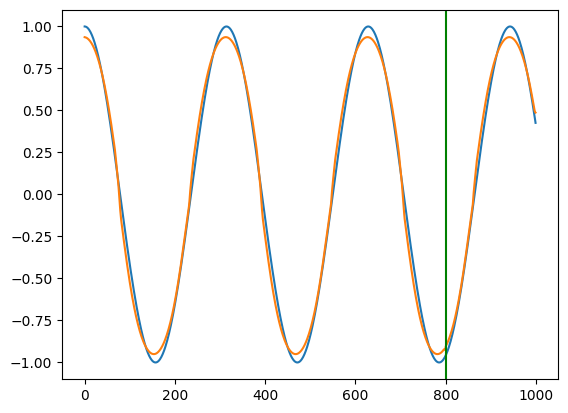

In [17]:
index=df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
#This line adds a vertical line to the plot at the index corresponding to the end of the training set (Tp). The line is colored green (c="g").
plt.axvline(df.index[Tp],c='g')
plt.show()
